In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import arange
from math import exp

In [2]:
def euler_method(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
        for j in range(m):
            new_ys[j].append( new_ys[j][i - 1] + h * function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) )
            
    return (new_x, new_ys)

def euler_method_recal(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
        for j in range(m):
            new_ys[j].append(new_ys[j][i - 1] + 
                h * (function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) 
                    + function_list[j](new_x[i], *[new_ys[k][i - 1] + h 
                        * function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) for k in range(m)]))/2)
            
    return (new_x, new_ys)

def runge_kutta_4(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
         for j in range(m):
            k_1 = function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)])
            k_2 = function_list[j](new_x[i - 1] + h/2, *[new_ys[k][i - 1] + k_1 * h/2 for k in range(m)])
            k_3 = function_list[j](new_x[i - 1] + h/2, *[new_ys[k][i - 1] + k_2 * h/2 for k in range(m)])
            k_4 = function_list[j](new_x[i - 1] + h, *[new_ys[k][i - 1] + k_3 for k in range(m)])
            new_ys[j].append(new_ys[j][i - 1] + h * (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6) 
            
    return (new_x, new_ys)

In [3]:
phi = 0.05
v_1 = 1
v_2 = 3
p_1 = 3
p_2 = 1

def y_0(x, *args):
    (y_0, y_1) = args
    return -(y_0 ** 2 - y_1 ** 2) * phi/v_1 + 0 * x

def y_1(x, *args):
    (y_0, y_1) = args
    return (y_0 ** 2 - y_1 ** 2) * phi/v_2 + 0 * x

start, end, h, n = 0, 20, 0.1, 15

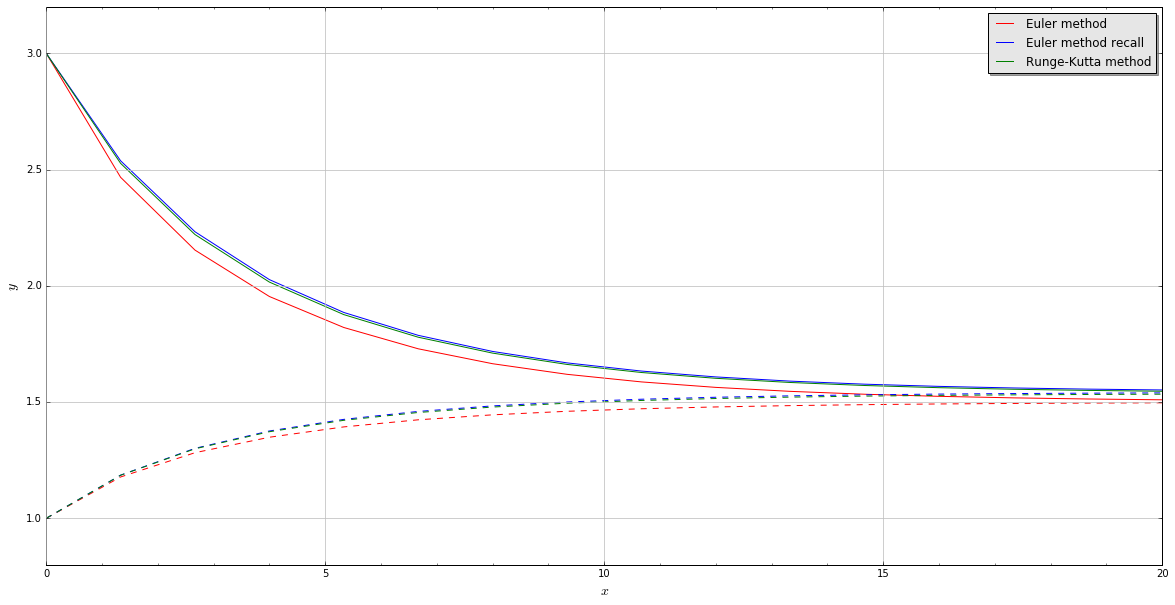

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-r',label = 'Euler method')
ax.plot(xs, ys[1], '--r')

xs, ys = euler_method_recal([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-b',label = 'Euler method recall')
ax.plot(xs, ys[1], '--b')

xs, ys = runge_kutta_4([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-g',label = 'Runge-Kutta method')
ax.plot(xs, ys[1], '--g')

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

plt.ylim(0.8, 3.2)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

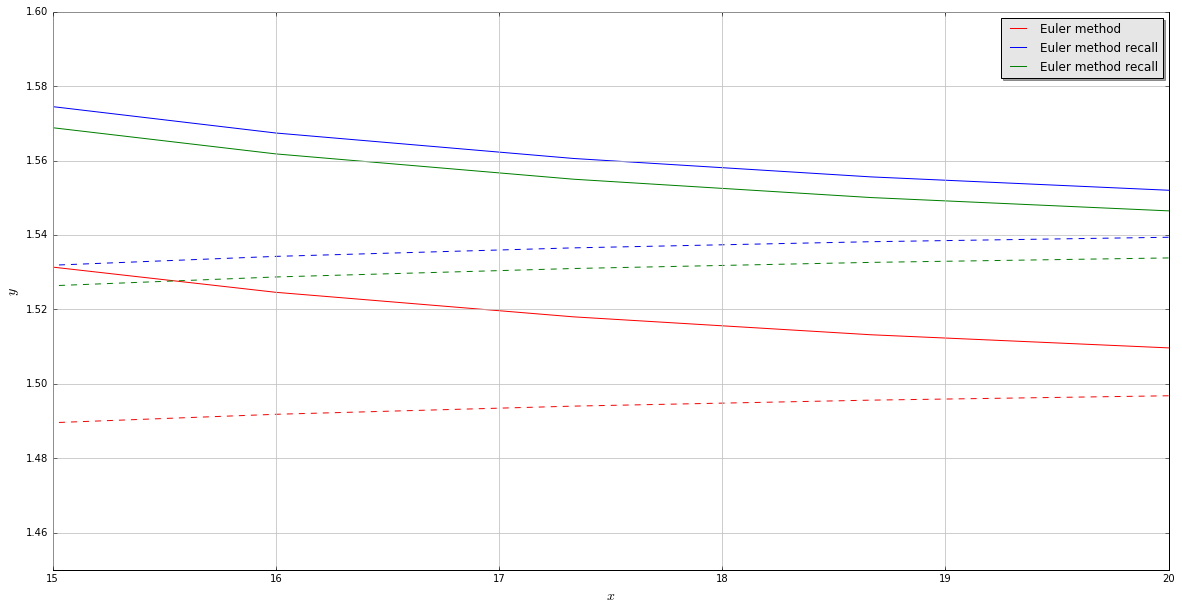

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-r',label = 'Euler method')
ax.plot(xs, ys[1], '--r')

xs, ys = euler_method_recal([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-b',label = 'Euler method recall')
ax.plot(xs, ys[1], '--b')

xs, ys = runge_kutta_4([y_0, y_1], arange(start, end + h, h), [p_1, p_2], n)
ax.plot(xs, ys[0], '-g',label = 'Runge-Kutta method')
ax.plot(xs, ys[1], '--g')

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

plt.xlim(15, 20)
plt.ylim(1.45, 1.6)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()